# - URLs for Data Import

In [2]:
from __future__ import print_function, division
import requests
requests.__path__
from bs4 import BeautifulSoup
import pandas as pd


In [435]:
url_list = [
#  'https://www.billboard.com/charts/hot-100/2019-03-09',
#  'https://www.billboard.com/charts/hot-100/2019-03-16',
#  'https://www.billboard.com/charts/hot-100/2019-03-23',
#  'https://www.billboard.com/charts/hot-100/2019-03-30',
#  'https://www.billboard.com/charts/hot-100/2019-04-06',
#  'https://www.billboard.com/charts/hot-100/2019-04-13',
#  'https://www.billboard.com/charts/hot-100/2019-04-20',
#  'https://www.billboard.com/charts/hot-100/2019-04-27',
#  'https://www.billboard.com/charts/hot-100/2019-05-04',
#  'https://www.billboard.com/charts/hot-100/2019-05-11',
#  'https://www.billboard.com/charts/hot-100/2019-05-18',
#  'https://www.billboard.com/charts/hot-100/2019-05-25',
#  'https://www.billboard.com/charts/hot-100/2019-06-01',
#  'https://www.billboard.com/charts/hot-100/2019-06-08',
#  'https://www.billboard.com/charts/hot-100/2019-06-15',
#  'https://www.billboard.com/charts/hot-100/2019-06-22',
#  'https://www.billboard.com/charts/hot-100/2019-06-29',
#  'https://www.billboard.com/charts/hot-100/2019-07-06',
#  'https://www.billboard.com/charts/hot-100/2019-07-13',
#  'https://www.billboard.com/charts/hot-100/2019-07-20',
#  'https://www.billboard.com/charts/hot-100/2019-07-27',
#  'https://www.billboard.com/charts/hot-100/2019-08-03',
#  'https://www.billboard.com/charts/hot-100/2019-08-10',
#  'https://www.billboard.com/charts/hot-100/2019-08-17',
#  'https://www.billboard.com/charts/hot-100/2019-08-24',
#  'https://www.billboard.com/charts/hot-100/2019-08-31',
#  'https://www.billboard.com/charts/hot-100/2019-09-07',
#  'https://www.billboard.com/charts/hot-100/2019-09-14',
#  'https://www.billboard.com/charts/hot-100/2019-09-21' ]
#   'https://www.billboard.com/charts/hot-100/2019-09-28']
 'https://www.billboard.com/charts/hot-100/2019-10-05']

In [3]:
def get_data(url):
    
    music_df = pd.DataFrame()
    
    
    response = requests.get(url)

    # soupify the text
    page = response.text 

    # parse the data from txt to lxml
    soup = BeautifulSoup(page, "lxml")

    # find all chart elements on page
    tables = soup.find_all(class_="chart-element__information")

    # find the artist names
    full_list_names = [row.find(class_="chart-element__information__artist text--truncate color--secondary").text for row in tables] 

    # find the song titles
    full_song_title = [row.find(class_="chart-element__information__song text--truncate color--primary").text for row in tables]

    # find last week rank number 
    full_rank_last = [row.find(class_="chart-element__information__delta__text text--last").text for row in tables]

    # find peak numbers
    full_rank_peak = [row.find(class_="chart-element__information__delta__text text--peak").text for row in tables]

    # full list of weeks on chart
    full_weeks_chart = [row.find(class_="chart-element__information__delta__text text--week").text for row in tables]

    music_df = pd.DataFrame({'artist name': full_list_names, 
                             'song title' : full_song_title, 
                             'last week rank': full_rank_last,
                             'peak rank': full_rank_peak,
                             'weeks on chart': full_weeks_chart} ) 

    return (music_df)

In [4]:
def urlsToDf(url_list):
    
    dfs = []

    for url in url_list:
        data = get_data(url)
        # store DataFrame in list
        dfs.append(data)
        
    return pd.concat(dfs)

In [5]:
music_df = urlsToDf(url_list)

NameError: name 'url_list' is not defined

In [ ]:
# I had to individually import each dataframe due to the format of the data on Billboard.com

# - Music DataFrame

In [439]:
music_df.head(10)

,artist name,song title,last week rank,peak rank,weeks on chart
0,Lizzo,Truth Hurts,1 Last Week,1 Peak Rank,21 Weeks on Chart
1,Shawn Mendes & Camila Cabello,Senorita,2 Last Week,1 Peak Rank,14 Weeks on Chart
2,Lewis Capaldi,Someone You Loved,4 Last Week,3 Peak Rank,20 Weeks on Chart
3,Lil Tecca,Ran$om,6 Last Week,4 Peak Rank,17 Weeks on Chart
4,Chris Brown Featuring Drake,No Guidance,7 Last Week,5 Peak Rank,16 Weeks on Chart
5,Lil Nas X,Panini,5 Last Week,5 Peak Rank,14 Weeks on Chart
6,Billie Eilish,Bad Guy,3 Last Week,1 Peak Rank,26 Weeks on Chart
7,Post Malone,Circles,9 Last Week,4 Peak Rank,4 Weeks on Chart
8,Post Malone Featuring Young Thug,Goodbyes,8 Last Week,3 Peak Rank,12 Weeks on Chart
9,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,10 Last Week,1 Peak Rank,30 Weeks on Chart


In [6]:
# Sept 14th

Sept14_music_df.head()

NameError: name 'Sept14_music_df' is not defined

In [423]:
# Sept 21st

Sept21_music_df.head()

,artist name,song title,last week rank,peak rank,weeks on chart
0,Lizzo,Truth Hurts,1 Last Week,1 Peak Rank,19 Weeks on Chart
1,Shawn Mendes & Camila Cabello,Senorita,2 Last Week,1 Peak Rank,12 Weeks on Chart
2,Post Malone Featuring Young Thug,Goodbyes,10 Last Week,3 Peak Rank,10 Weeks on Chart
3,Post Malone,Circles,7 Last Week,4 Peak Rank,2 Weeks on Chart
4,Billie Eilish,Bad Guy,3 Last Week,1 Peak Rank,24 Weeks on Chart


In [434]:
# Sept 28th

Sept28_music_df.head()

,artist name,song title,last week rank,peak rank,weeks on chart
0,Lizzo,Truth Hurts,1 Last Week,1 Peak Rank,20 Weeks on Chart
1,Shawn Mendes & Camila Cabello,Senorita,2 Last Week,1 Peak Rank,13 Weeks on Chart
2,Billie Eilish,Bad Guy,5 Last Week,1 Peak Rank,25 Weeks on Chart
3,Lewis Capaldi,Someone You Loved,9 Last Week,4 Peak Rank,19 Weeks on Chart
4,Lil Nas X,Panini,14 Last Week,5 Peak Rank,13 Weeks on Chart


In [441]:
# Oct 05th 
Oct05_music_df.head()

,artist name,song title,last week rank,peak rank,weeks on chart
0,Lizzo,Truth Hurts,1 Last Week,1 Peak Rank,21 Weeks on Chart
1,Shawn Mendes & Camila Cabello,Senorita,2 Last Week,1 Peak Rank,14 Weeks on Chart
2,Lewis Capaldi,Someone You Loved,4 Last Week,3 Peak Rank,20 Weeks on Chart
3,Lil Tecca,Ran$om,6 Last Week,4 Peak Rank,17 Weeks on Chart
4,Chris Brown Featuring Drake,No Guidance,7 Last Week,5 Peak Rank,16 Weeks on Chart


In [333]:
music_df.shape

(100, 5)

In [334]:
# create the artist name column 
billboard_df = music_df.copy()
clean_artist_column = billboard_df['artist name'].str.split(pat = "&",n = 1, expand = True)
clean_artist_column = pd.DataFrame(clean_artist_column[0].str.replace('x','Featuring'))
clean_artist_column = pd.DataFrame(clean_artist_column[0].str.replace('X','Featuring'))
clean_artist_column = pd.DataFrame(clean_artist_column[0].str.replace('Lil Nas X','Lil Naa A'))
clean_artist_column = clean_artist_column[0].str.split(pat = "Featuring",n = 1, expand = True)
clean_artist_column = clean_artist_column[0].str.split(pat = "featuring",n = 1, expand = True)
clean_artist_column = clean_artist_column[0].str.split(pat = ",",n = 1, expand = True)
clean_artist_column = clean_artist_column[0].str.split(pat = "+",n = 1, expand = True)

# - EDA: Data Cleansing

In [335]:
# convert Lil Nas X back 
clean_artist_column = pd.DataFrame(clean_artist_column[0].str.replace('Lil Nas','Lil Nas X'))

# remove extra space
clean_artist_column = pd.DataFrame(clean_artist_column[0].str.strip())

In [336]:
#14,32, 86, 96
name_song_columns.iloc[96]

clean artist name    Ali Gatie
clean song title      It's You
audio features             NaN
Name: 96, dtype: object

In [368]:
# clean the song title column
clean_song_column = pd.DataFrame(billboard_df['song title'].str.replace('$','s'))
clean_song_column = pd.DataFrame(clean_song_column['song title'].str.replace("(Spider-Man: Into The Spider-Verse)",' '))
# clean_song_column = pd.DataFrame(clean_song_column['song title'].str.replace("'", ""))
# clean_song_column = pd.DataFrame(clean_song_column['song title'].str.replace('"', ""))
# clean_song_column.iloc[12] = 'Sunflower'
# clean_song_column.iloc[86] = '223s'
clean_song_column.iloc[82] = 'Its You'
# clean_song_column.iloc[32] = 'Im Gonna Be'
# clean_song_column.iloc[14] = 'Hollywoods'
clean_song_column.iloc[43] = 'Gods Country'


# remove extra space
clean_song_column = pd.DataFrame(clean_song_column['song title'].str.strip())
clean_song_column = pd.DataFrame(clean_song_column['song title'].str.strip())
clean_song_column.iloc[51] 

song title    Bad Bad Bad
Name: 51, dtype: object

In [369]:
billboard_df.head()

,artist name,song title,last week rank,peak rank,weeks on chart,clean artist name,clean song title
0,Lizzo,Truth Hurts,1 Last Week,1 Peak Rank,18 Weeks on Chart,Lizzo,Truth Hurts
1,Shawn Mendes & Camila Cabello,Senorita,2 Last Week,1 Peak Rank,11 Weeks on Chart,Shawn Mendes,Senorita
2,Billie Eilish,Bad Guy,3 Last Week,1 Peak Rank,23 Weeks on Chart,Billie Eilish,Bad Guy
3,Lil Tecca,Ran$om,6 Last Week,4 Peak Rank,14 Weeks on Chart,Lil Tecca,Ransom
4,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,5 Last Week,1 Peak Rank,27 Weeks on Chart,Lil Nas X,Old Town Road


In [370]:
billboard_df['clean artist name'] = clean_artist_column

In [371]:
billboard_df['clean song title'] = clean_song_column

In [372]:
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
artist name          100 non-null object
song title           100 non-null object
last week rank       100 non-null object
peak rank            100 non-null object
weeks on chart       100 non-null object
clean artist name    100 non-null object
clean song title     100 non-null object
dtypes: object(7)
memory usage: 5.5+ KB


In [373]:
# Create a dataframe with the clean artist names and song titles

name_song_columns = billboard_df.iloc[:,5:7]
name_song_columns.head()

,clean artist name,clean song title
0,Lizzo,Truth Hurts
1,Shawn Mendes,Senorita
2,Billie Eilish,Bad Guy
3,Lil Tecca,Ransom
4,Lil Nas X,Old Town Road


# - Spotipy

In [1]:
# Python library to communicate with the Spotify Web API

In [353]:
import sys
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pprint
import numpy as np
from collections import OrderedDict

# client credentials 
client_id = "xxx" # removed client id
client_secret = "xxx" # removed client secret

# client credentials flow
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [55]:
# Returns a Order Dictoinary
def get_spotify_features(track, artist):
    #Search for Spofity song ID 
    songs=sp.search(q='track:'+track+' '+'artist:'+artist+'*' , type='track')
    items = songs['tracks']['items']
    

    track = items[0]
    song_id = str(track["id"])
        
    #Use ID to get Song features
    track_features=sp.audio_features(song_id)
    features_to_df = np.array(track_features)[0]
    
    #Order Dictionary
    features_to_df = OrderedDict(features_to_df)
    #Get Dictionary values
    feature_values = features_to_df.values()
    feature_values = [feature_values]
    
    return(feature_values)

In [112]:
billboard_df.iloc[51]

artist name          Ariana Grande, Miley Cyrus & Lana Del Rey
song title              Don't Call Me Angel (Charlie's Angels)
last week rank                                    13 Last Week
peak rank                                         13 Peak Rank
weeks on chart                                2 Weeks on Chart
clean artist name                                Ariana Grande
clean song title        Don't Call Me Angel (Charlie's Angels)
Name: 51, dtype: object

In [375]:
#43, 82
name_song_columns.iloc[43]

clean artist name    Blake Shelton
clean song title      Gods Country
Name: 43, dtype: object

In [379]:
# return audio features of all songs

name_song_columns['audio features'] = name_song_columns.iloc[:].apply(lambda i: pd.Series(get_spotify_features((i["clean song title"]),(i["clean artist name"]))) ,axis=1)


/Users/ronald-daley/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [380]:
# Sept 14th - Datasets

Sept14 = name_song_columns.copy()

In [ ]:
###### 4 Months of Data #########

In [381]:
# Sept 14th - Datasets

Sept14.head()

,clean artist name,clean song title,audio features
0,Lizzo,Truth Hurts,"(0.715, 0.624, 4, -3.046, 0, 0.114, 0.11, 0, 0..."
1,Shawn Mendes,Senorita,"(0.759, 0.54, 9, -6.039, 0, 0.0287, 0.037, 0, ..."
2,Billie Eilish,Bad Guy,"(0.701, 0.425, 7, -10.965, 1, 0.375, 0.328, 0...."
3,Lil Tecca,Ransom,"(0.745, 0.642, 7, -6.257, 0, 0.287, 0.0204, 0,..."
4,Lil Nas X,Old Town Road,"(0.878, 0.619, 6, -5.56, 1, 0.102, 0.0533, 0, ..."


In [302]:
# Sept 21 - Datasets

Sept21.head()

,clean artist name,clean song title,audio features
0,Lizzo,Truth Hurts,"(0.715, 0.624, 4, -3.046, 0, 0.114, 0.11, 0, 0..."
1,Shawn Mendes,Senorita,"(0.759, 0.54, 9, -6.039, 0, 0.0287, 0.037, 0, ..."
2,Post Malone,Goodbyes,"(0.548, 0.653, 5, -3.875, 1, 0.081, 0.456, 0, ..."
3,Post Malone,Circles,"(0.695, 0.762, 0, -3.497, 1, 0.0395, 0.192, 0...."
4,Billie Eilish,Bad Guy,"(0.701, 0.425, 7, -10.965, 1, 0.375, 0.328, 0...."


In [303]:
# Sept 28 - Datasets

Sept28.head()

,clean artist name,clean song title,audio features
0,Lizzo,Truth Hurts,"(0.715, 0.624, 4, -3.046, 0, 0.114, 0.11, 0, 0..."
1,Shawn Mendes,Senorita,"(0.759, 0.54, 9, -6.039, 0, 0.0287, 0.037, 0, ..."
2,Billie Eilish,Bad Guy,"(0.701, 0.425, 7, -10.965, 1, 0.375, 0.328, 0...."
3,Lewis Capaldi,Someone You Loved,"(0.501, 0.405, 1, -5.679, 1, 0.0319, 0.751, 0,..."
4,Lil Nas X,Panini,"(0.703, 0.594, 5, -6.146, 0, 0.0752, 0.342, 0,..."


In [304]:
# Oct 05 - Datasets

Oct05.head()

,clean artist name,clean song title,audio features
0,Lizzo,Truth Hurts,"(0.715, 0.624, 4, -3.046, 0, 0.114, 0.11, 0, 0..."
1,Shawn Mendes,Senorita,"(0.759, 0.54, 9, -6.039, 0, 0.0287, 0.037, 0, ..."
2,Lewis Capaldi,Someone You Loved,"(0.501, 0.405, 1, -5.679, 1, 0.0319, 0.751, 0,..."
3,Lil Tecca,Ransom,"(0.745, 0.642, 7, -6.257, 0, 0.287, 0.0204, 0,..."
4,Chris Brown,No Guidance,"(0.698, 0.454, 1, -6.756, 0, 0.151, 0.123, 0, ..."


In [382]:
Oct05.head()

,clean artist name,clean song title,audio features
0,Lizzo,Truth Hurts,"(0.715, 0.624, 4, -3.046, 0, 0.114, 0.11, 0, 0..."
1,Shawn Mendes,Senorita,"(0.759, 0.54, 9, -6.039, 0, 0.0287, 0.037, 0, ..."
2,Lewis Capaldi,Someone You Loved,"(0.501, 0.405, 1, -5.679, 1, 0.0319, 0.751, 0,..."
3,Lil Tecca,Ransom,"(0.745, 0.642, 7, -6.257, 0, 0.287, 0.0204, 0,..."
4,Chris Brown,No Guidance,"(0.698, 0.454, 1, -6.756, 0, 0.151, 0.123, 0, ..."


In [384]:
# Add the column names for audio features
audio_features_cols = ['danceability',
        'energy',
        'key',
        'loudness',
        'mode',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo',
        'type',
        'id',
        'uri',
        'track_href',
        'analysis_url',
        'duration_ms',
        'time_signature']

In [389]:
### Finding audio features for each dataset

In [388]:
# Oct05 audio features
Oct05_audio_features = pd.DataFrame([i for i in Oct05['audio features']], columns = audio_features_cols)
Oct05_audio_features.shape

(100, 18)

In [392]:
# Sept28 audio features
Sept28_audio_features = pd.DataFrame([i for i in Sept28['audio features']], columns = audio_features_cols)
Sept28_audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.715,0.624,4,-3.046,0,0.1140,0.110,0.00,0.1230,0.412,158.087,audio_features,5qmq61DAAOUaW8AUo8xKhh,spotify:track:5qmq61DAAOUaW8AUo8xKhh,https://api.spotify.com/v1/tracks/5qmq61DAAOUa...,https://api.spotify.com/v1/audio-analysis/5qmq...,173325,4
1,0.759,0.540,9,-6.039,0,0.0287,0.037,0.00,0.0945,0.750,116.947,audio_features,0TK2YIli7K1leLovkQiNik,spotify:track:0TK2YIli7K1leLovkQiNik,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,https://api.spotify.com/v1/audio-analysis/0TK2...,190960,4
2,0.701,0.425,7,-10.965,1,0.3750,0.328,0.13,0.1000,0.562,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4
3,0.501,0.405,1,-5.679,1,0.0319,0.751,0.00,0.1050,0.446,109.891,audio_features,7qEHsqek33rTcFNT9PFqLf,spotify:track:7qEHsqek33rTcFNT9PFqLf,https://api.spotify.com/v1/tracks/7qEHsqek33rT...,https://api.spotify.com/v1/audio-analysis/7qEH...,182161,4
4,0.703,0.594,5,-6.146,0,0.0752,0.342,0.00,0.1230,0.475,153.848,audio_features,6fTt0CH2t0mdeB2N9XFG5r,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,https://api.spotify.com/v1/audio-analysis/6fTt...,114893,4


In [393]:
# Sept 21 - audio features
Sept21_audio_features = pd.DataFrame([i for i in Sept21['audio features']], columns = audio_features_cols)
Sept21_audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.715,0.624,4,-3.046,0,0.1140,0.110,0.00000,0.1230,0.412,158.087,audio_features,5qmq61DAAOUaW8AUo8xKhh,spotify:track:5qmq61DAAOUaW8AUo8xKhh,https://api.spotify.com/v1/tracks/5qmq61DAAOUa...,https://api.spotify.com/v1/audio-analysis/5qmq...,173325,4
1,0.759,0.540,9,-6.039,0,0.0287,0.037,0.00000,0.0945,0.750,116.947,audio_features,0TK2YIli7K1leLovkQiNik,spotify:track:0TK2YIli7K1leLovkQiNik,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,https://api.spotify.com/v1/audio-analysis/0TK2...,190960,4
2,0.548,0.653,5,-3.875,1,0.0810,0.456,0.00000,0.1030,0.163,150.068,audio_features,0t3ZvGKlmYmVsDzBJAXK8C,spotify:track:0t3ZvGKlmYmVsDzBJAXK8C,https://api.spotify.com/v1/tracks/0t3ZvGKlmYmV...,https://api.spotify.com/v1/audio-analysis/0t3Z...,174853,4
3,0.695,0.762,0,-3.497,1,0.0395,0.192,0.00244,0.0863,0.553,120.042,audio_features,21jGcNKet2qwijlDFuPiPb,spotify:track:21jGcNKet2qwijlDFuPiPb,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,https://api.spotify.com/v1/audio-analysis/21jG...,215280,4
4,0.701,0.425,7,-10.965,1,0.3750,0.328,0.13000,0.1000,0.562,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4


In [394]:
# Sept 14 - audio features
Sept14_audio_features = pd.DataFrame([i for i in Sept14['audio features']], columns = audio_features_cols)
Sept14_audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.715,0.624,4,-3.046,0,0.1140,0.1100,0.00,0.1230,0.412,158.087,audio_features,5qmq61DAAOUaW8AUo8xKhh,spotify:track:5qmq61DAAOUaW8AUo8xKhh,https://api.spotify.com/v1/tracks/5qmq61DAAOUa...,https://api.spotify.com/v1/audio-analysis/5qmq...,173325,4
1,0.759,0.540,9,-6.039,0,0.0287,0.0370,0.00,0.0945,0.750,116.947,audio_features,0TK2YIli7K1leLovkQiNik,spotify:track:0TK2YIli7K1leLovkQiNik,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,https://api.spotify.com/v1/audio-analysis/0TK2...,190960,4
2,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.13,0.1000,0.562,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4
3,0.745,0.642,7,-6.257,0,0.2870,0.0204,0.00,0.0658,0.226,179.974,audio_features,1lOe9qE0vR9zwWQAOk6CoO,spotify:track:1lOe9qE0vR9zwWQAOk6CoO,https://api.spotify.com/v1/tracks/1lOe9qE0vR9z...,https://api.spotify.com/v1/audio-analysis/1lOe...,131240,4
4,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.00,0.1130,0.639,136.041,audio_features,2YpeDb67231RjR0MgVLzsG,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4


In [395]:
##### Music Data for a Month ###

In [446]:
# Oct 05 - create an index column in order to join the two columns

Oct05_df = Oct05_music_df.reset_index()
Oct05_audio_features_df = Oct05_audio_features.reset_index()
Oct05_df = pd.merge(left= Oct05_df , right = Oct05_audio_features_df)
Oct05_df = Oct05_df.drop(columns=[
        'type','id','uri', 'track_href','analysis_url'])
Oct05_df.head(10)

,index,artist name,song title,last week rank,peak rank,weeks on chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Lizzo,Truth Hurts,1 Last Week,1 Peak Rank,21 Weeks on Chart,0.715,0.624,4,-3.046,0,0.1140,0.1100,0.00000,0.1230,0.412,158.087,173325,4
1,1,Shawn Mendes & Camila Cabello,Senorita,2 Last Week,1 Peak Rank,14 Weeks on Chart,0.759,0.540,9,-6.039,0,0.0287,0.0370,0.00000,0.0945,0.750,116.947,190960,4
2,2,Lewis Capaldi,Someone You Loved,4 Last Week,3 Peak Rank,20 Weeks on Chart,0.501,0.405,1,-5.679,1,0.0319,0.7510,0.00000,0.1050,0.446,109.891,182161,4
3,3,Lil Tecca,Ran$om,6 Last Week,4 Peak Rank,17 Weeks on Chart,0.745,0.642,7,-6.257,0,0.2870,0.0204,0.00000,0.0658,0.226,179.974,131240,4
4,4,Chris Brown Featuring Drake,No Guidance,7 Last Week,5 Peak Rank,16 Weeks on Chart,0.698,0.454,1,-6.756,0,0.1510,0.1230,0.00000,0.1550,0.137,92.932,260640,4
5,5,Lil Nas X,Panini,5 Last Week,5 Peak Rank,14 Weeks on Chart,0.703,0.594,5,-6.146,0,0.0752,0.3420,0.00000,0.1230,0.475,153.848,114893,4
6,6,Billie Eilish,Bad Guy,3 Last Week,1 Peak Rank,26 Weeks on Chart,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.13000,0.1000,0.562,135.128,194088,4
7,7,Post Malone,Circles,9 Last Week,4 Peak Rank,4 Weeks on Chart,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.00244,0.0863,0.553,120.042,215280,4
8,8,Post Malone Featuring Young Thug,Goodbyes,8 Last Week,3 Peak Rank,12 Weeks on Chart,0.548,0.653,5,-3.875,1,0.0810,0.4560,0.00000,0.1030,0.163,150.068,174853,4
9,9,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,10 Last Week,1 Peak Rank,30 Weeks on Chart,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.00000,0.1130,0.639,136.041,157067,4


In [ ]:
# Update current rank

In [455]:
# drop index column
Oct05_df2 = Oct05_df.copy()
Oct05_df2 = Oct05_df2.drop(columns=['index'])

In [457]:
# add current rank column
Oct05_df2 = Oct05_df2.reset_index()
Oct05_df2['current rank'] = Oct05_df2.index + 1

In [459]:
#Add Date column
Oct05_df2['Week of'] = pd.to_datetime('2019-10-05')

In [467]:
Oct05_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
index               100 non-null int64
artist name         100 non-null object
song title          100 non-null object
last week rank      93 non-null float64
peak rank           100 non-null int64
weeks on chart      100 non-null int64
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null int64
loudness            100 non-null float64
mode                100 non-null int64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null int64
time_signature      100 non-null int64
current rank        100 non-null int64
Week of             100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(8

In [ ]:
# Update ranks

In [462]:
# last week rank
Oct05_df2['last week rank'] = Oct05_df2['last week rank'].astype(str)
Oct05_df2['last week rank'] = Oct05_df2['last week rank'].replace('Last Week','', regex=True).replace('- ','',regex=True).str.strip().replace('', np.nan)
Oct05_df2['last week rank'] = Oct05_df2['last week rank'].astype(float)

In [465]:
# peak rank
Oct05_df2['peak rank'] = (Oct05_df2['peak rank'].astype(str).replace('Peak Rank','', regex=True)).astype(int)

In [466]:
Oct05_df2['weeks on chart'] = (Oct05_df2['weeks on chart'].astype(str).replace('Weeks on Chart','', regex=True)).astype(int)

In [469]:
Oct05_df2.tail()

,index,artist name,song title,last week rank,peak rank,weeks on chart,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,current rank,Week of
95,95,"DJ Snake, J. Balvin & Tyga",Loco Contigo,NaN,96,1,0.694,0.758,11,-2.986,...,0.2180,0.2780,0.000001,0.1020,0.3710,192.091,185195,4,96,2019-10-05
96,96,Camila Cabello,Shameless,95.0,60,3,0.377,0.651,4,-5.437,...,0.0588,0.0197,0.000053,0.1740,0.0851,129.698,219742,4,97,2019-10-05
97,97,Sarah Jeffery,Queen Of Mean,79.0,49,8,0.543,0.787,8,-6.520,...,0.2410,0.2480,0.000000,0.0778,0.3430,173.702,189397,4,98,2019-10-05
98,98,Jason Aldean,Rearview Town,92.0,40,18,0.526,0.850,10,-4.470,...,0.0313,0.0230,0.000000,0.0948,0.3380,141.973,184173,4,99,2019-10-05
99,99,Maren Morris,The Bones,NaN,96,2,0.612,0.570,11,-6.642,...,0.0347,0.2790,0.000000,0.0963,0.3350,77.004,197293,4,100,2019-10-05


In [447]:
# Sept 28 - create an index column in order to join the two columns

Sept28_df = Sept28_music_df.reset_index()
Sept28_audio_features_df = Sept28_audio_features.reset_index()
Sept28_df = pd.merge(left= Sept28_df , right = Sept28_audio_features_df)
Sept28_df = Sept28_df.drop(columns=[
        'type','id','uri', 'track_href','analysis_url'])
Sept28_df.head(10)

,index,artist name,song title,last week rank,peak rank,weeks on chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Lizzo,Truth Hurts,1 Last Week,1 Peak Rank,20 Weeks on Chart,0.715,0.624,4,-3.046,0,0.1140,0.1100,0.00000,0.1230,0.412,158.087,173325,4
1,1,Shawn Mendes & Camila Cabello,Senorita,2 Last Week,1 Peak Rank,13 Weeks on Chart,0.759,0.540,9,-6.039,0,0.0287,0.0370,0.00000,0.0945,0.750,116.947,190960,4
2,2,Billie Eilish,Bad Guy,5 Last Week,1 Peak Rank,25 Weeks on Chart,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.13000,0.1000,0.562,135.128,194088,4
3,3,Lewis Capaldi,Someone You Loved,9 Last Week,4 Peak Rank,19 Weeks on Chart,0.501,0.405,1,-5.679,1,0.0319,0.7510,0.00000,0.1050,0.446,109.891,182161,4
4,4,Lil Nas X,Panini,14 Last Week,5 Peak Rank,13 Weeks on Chart,0.703,0.594,5,-6.146,0,0.0752,0.3420,0.00000,0.1230,0.475,153.848,114893,4
5,5,Lil Tecca,Ran$om,6 Last Week,4 Peak Rank,16 Weeks on Chart,0.745,0.642,7,-6.257,0,0.2870,0.0204,0.00000,0.0658,0.226,179.974,131240,4
6,6,Chris Brown Featuring Drake,No Guidance,7 Last Week,6 Peak Rank,15 Weeks on Chart,0.698,0.454,1,-6.756,0,0.1510,0.1230,0.00000,0.1550,0.137,92.932,260640,4
7,7,Post Malone Featuring Young Thug,Goodbyes,3 Last Week,3 Peak Rank,11 Weeks on Chart,0.548,0.653,5,-3.875,1,0.0810,0.4560,0.00000,0.1030,0.163,150.068,174853,4
8,8,Post Malone,Circles,4 Last Week,4 Peak Rank,3 Weeks on Chart,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.00244,0.0863,0.553,120.042,215280,4
9,9,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,11 Last Week,1 Peak Rank,29 Weeks on Chart,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.00000,0.1130,0.639,136.041,157067,4


In [471]:
Sept28_df2 = Sept28_df.copy()

# drop index column
Sept28_df2 = Sept28_df2.copy()
Sept28_df2 = Sept28_df2.drop(columns=['index'])

# add current rank column
Sept28_df2 = Sept28_df2.reset_index()
Sept28_df2['current rank'] = Sept28_df2.index + 1

# add Date column
Sept28_df2['Week of'] = pd.to_datetime('2019-09-28')

In [474]:
# last week rank
Sept28_df2['last week rank'] = Sept28_df2['last week rank'].astype(str)
Sept28_df2['last week rank'] = Sept28_df2['last week rank'].replace('Last Week','', regex=True).replace('- ','',regex=True).str.strip().replace('', np.nan)
Sept28_df2['last week rank'] = Sept28_df2['last week rank'].astype(float)

In [475]:
# peak rank
Sept28_df2['peak rank'] = (Sept28_df2['peak rank'].astype(str).replace('Peak Rank','', regex=True)).astype(int)

In [476]:
# weeks on chart
Sept28_df2['weeks on chart'] = (Sept28_df2['weeks on chart'].astype(str).replace('Weeks on Chart','', regex=True)).astype(int)

In [479]:
Sept28_df2.head()

,index,artist name,song title,last week rank,peak rank,weeks on chart,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,current rank,Week of
0,0,Lizzo,Truth Hurts,1.0,1,20,0.715,0.624,4,-3.046,...,0.1140,0.110,0.00,0.1230,0.412,158.087,173325,4,1,2019-09-28
1,1,Shawn Mendes & Camila Cabello,Senorita,2.0,1,13,0.759,0.540,9,-6.039,...,0.0287,0.037,0.00,0.0945,0.750,116.947,190960,4,2,2019-09-28
2,2,Billie Eilish,Bad Guy,5.0,1,25,0.701,0.425,7,-10.965,...,0.3750,0.328,0.13,0.1000,0.562,135.128,194088,4,3,2019-09-28
3,3,Lewis Capaldi,Someone You Loved,9.0,4,19,0.501,0.405,1,-5.679,...,0.0319,0.751,0.00,0.1050,0.446,109.891,182161,4,4,2019-09-28
4,4,Lil Nas X,Panini,14.0,5,13,0.703,0.594,5,-6.146,...,0.0752,0.342,0.00,0.1230,0.475,153.848,114893,4,5,2019-09-28


In [448]:
# Sept 21st - create an index column in order to join the two columns

Sept21_df = Sept21_music_df.reset_index()
Sept21_audio_features_df = Sept21_audio_features.reset_index()
Sept21_df = pd.merge(left= Sept21_df , right = Sept21_audio_features_df)
Sept21_df = Sept21_df.drop(columns=[
        'type','id','uri', 'track_href','analysis_url'])
Sept21_df.head(10)

,index,artist name,song title,last week rank,peak rank,weeks on chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Lizzo,Truth Hurts,1 Last Week,1 Peak Rank,19 Weeks on Chart,0.715,0.624,4,-3.046,0,0.1140,0.1100,0.00000,0.1230,0.412,158.087,173325,4
1,1,Shawn Mendes & Camila Cabello,Senorita,2 Last Week,1 Peak Rank,12 Weeks on Chart,0.759,0.540,9,-6.039,0,0.0287,0.0370,0.00000,0.0945,0.750,116.947,190960,4
2,2,Post Malone Featuring Young Thug,Goodbyes,10 Last Week,3 Peak Rank,10 Weeks on Chart,0.548,0.653,5,-3.875,1,0.0810,0.4560,0.00000,0.1030,0.163,150.068,174853,4
3,3,Post Malone,Circles,7 Last Week,4 Peak Rank,2 Weeks on Chart,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.00244,0.0863,0.553,120.042,215280,4
4,4,Billie Eilish,Bad Guy,3 Last Week,1 Peak Rank,24 Weeks on Chart,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.13000,0.1000,0.562,135.128,194088,4
5,5,Lil Tecca,Ran$om,4 Last Week,4 Peak Rank,15 Weeks on Chart,0.745,0.642,7,-6.257,0,0.2870,0.0204,0.00000,0.0658,0.226,179.974,131240,4
6,6,Chris Brown Featuring Drake,No Guidance,6 Last Week,6 Peak Rank,14 Weeks on Chart,0.698,0.454,1,-6.756,0,0.1510,0.1230,0.00000,0.1550,0.137,92.932,260640,4
7,7,Post Malone Featuring Ozzy Osbourne & Travis S...,Take What You Want,- Last Week,8 Peak Rank,1 Weeks on Chart,0.499,0.800,1,-2.665,0,0.0502,0.0906,0.00000,0.1470,0.272,139.919,229573,4
8,8,Lewis Capaldi,Someone You Loved,11 Last Week,9 Peak Rank,18 Weeks on Chart,0.501,0.405,1,-5.679,1,0.0319,0.7510,0.00000,0.1050,0.446,109.891,182161,4
9,9,Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse),14 Last Week,1 Peak Rank,47 Weeks on Chart,0.760,0.479,2,-5.574,1,0.0466,0.5560,0.00000,0.0703,0.913,89.911,158040,4


In [480]:
Sept21_df2 = Sept21_df.copy()

# drop index column
Sept21_df2 = Sept21_df2.copy()
Sept21_df2 = Sept21_df2.drop(columns=['index'])

# add current rank column
Sept21_df2 = Sept21_df2.reset_index()
Sept21_df2['current rank'] = Sept21_df2.index + 1

# add Date column
Sept21_df2['Week of'] = pd.to_datetime('2019-09-21')

In [481]:
Sept21_df2.head()

,index,artist name,song title,last week rank,peak rank,weeks on chart,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,current rank,Week of
0,0,Lizzo,Truth Hurts,1 Last Week,1 Peak Rank,19 Weeks on Chart,0.715,0.624,4,-3.046,...,0.1140,0.110,0.00000,0.1230,0.412,158.087,173325,4,1,2019-09-21
1,1,Shawn Mendes & Camila Cabello,Senorita,2 Last Week,1 Peak Rank,12 Weeks on Chart,0.759,0.540,9,-6.039,...,0.0287,0.037,0.00000,0.0945,0.750,116.947,190960,4,2,2019-09-21
2,2,Post Malone Featuring Young Thug,Goodbyes,10 Last Week,3 Peak Rank,10 Weeks on Chart,0.548,0.653,5,-3.875,...,0.0810,0.456,0.00000,0.1030,0.163,150.068,174853,4,3,2019-09-21
3,3,Post Malone,Circles,7 Last Week,4 Peak Rank,2 Weeks on Chart,0.695,0.762,0,-3.497,...,0.0395,0.192,0.00244,0.0863,0.553,120.042,215280,4,4,2019-09-21
4,4,Billie Eilish,Bad Guy,3 Last Week,1 Peak Rank,24 Weeks on Chart,0.701,0.425,7,-10.965,...,0.3750,0.328,0.13000,0.1000,0.562,135.128,194088,4,5,2019-09-21


In [482]:
# last week rank
Sept21_df2['last week rank'] = Sept21_df2['last week rank'].astype(str)
Sept21_df2['last week rank'] = Sept21_df2['last week rank'].replace('Last Week','', regex=True).replace('- ','',regex=True).str.strip().replace('', np.nan)
Sept21_df2['last week rank'] = Sept21_df2['last week rank'].astype(float)

In [483]:
# peak rank
Sept21_df2['peak rank'] = (Sept21_df2['peak rank'].astype(str).replace('Peak Rank','', regex=True)).astype(int)

In [484]:
# weeks on chart
Sept21_df2['weeks on chart'] = (Sept21_df2['weeks on chart'].astype(str).replace('Weeks on Chart','', regex=True)).astype(int)

In [486]:
Sept21_df2.tail()

,index,artist name,song title,last week rank,peak rank,weeks on chart,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,current rank,Week of
95,95,Taylor Swift,The Man,61.0,23,3,0.777,0.658,0,-5.191,...,0.0540,0.0767,0.000000,0.0901,0.633,110.048,190360,4,96,2019-09-21
96,96,Ali Gatie,It's You,83.0,70,13,0.732,0.463,11,-6.972,...,0.0287,0.3740,0.000000,0.1940,0.397,95.971,212607,4,97,2019-09-21
97,97,"YG, Tyga & Jon Z",Go Loko,87.0,49,19,0.880,0.670,2,-5.188,...,0.0429,0.2990,0.000005,0.0677,0.142,100.995,299227,4,98,2019-09-21
98,98,Summer Walker,Playing Games,NaN,87,2,0.763,0.426,11,-6.582,...,0.0570,0.6100,0.000000,0.1750,0.531,115.952,143027,4,99,2019-09-21
99,99,Lana Del Rey,Doin' Time,59.0,59,2,0.649,0.538,7,-11.196,...,0.0519,0.3720,0.006320,0.0951,0.496,144.979,202193,4,100,2019-09-21


In [449]:
# Sept 14th - create an index column in order to join the two columns

Sept14_df = Sept14_music_df.reset_index()
Sept14_audio_features_df = Sept14_audio_features.reset_index()
Sept14_df = pd.merge(left= Sept14_df , right = Sept14_audio_features_df)
Sept14_df = Sept14_df.drop(columns=[
        'type','id','uri', 'track_href','analysis_url'])
Sept14_df.head(10)

,index,artist name,song title,last week rank,peak rank,weeks on chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Lizzo,Truth Hurts,1 Last Week,1 Peak Rank,18 Weeks on Chart,0.715,0.624,4,-3.046,0,0.1140,0.1100,0.00000,0.1230,0.412,158.087,173325,4
1,1,Shawn Mendes & Camila Cabello,Senorita,2 Last Week,1 Peak Rank,11 Weeks on Chart,0.759,0.540,9,-6.039,0,0.0287,0.0370,0.00000,0.0945,0.750,116.947,190960,4
2,2,Billie Eilish,Bad Guy,3 Last Week,1 Peak Rank,23 Weeks on Chart,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.13000,0.1000,0.562,135.128,194088,4
3,3,Lil Tecca,Ran$om,6 Last Week,4 Peak Rank,14 Weeks on Chart,0.745,0.642,7,-6.257,0,0.2870,0.0204,0.00000,0.0658,0.226,179.974,131240,4
4,4,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,5 Last Week,1 Peak Rank,27 Weeks on Chart,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.00000,0.1130,0.639,136.041,157067,4
5,5,Chris Brown Featuring Drake,No Guidance,7 Last Week,6 Peak Rank,13 Weeks on Chart,0.698,0.454,1,-6.756,0,0.1510,0.1230,0.00000,0.1550,0.137,92.932,260640,4
6,6,Post Malone,Circles,- Last Week,7 Peak Rank,1 Weeks on Chart,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.00244,0.0863,0.553,120.042,215280,4
7,7,Ed Sheeran & Justin Bieber,I Don't Care,9 Last Week,2 Peak Rank,17 Weeks on Chart,0.798,0.675,6,-5.041,1,0.0442,0.0912,0.00000,0.0894,0.842,101.956,219947,4
8,8,Khalid,Talk,8 Last Week,3 Peak Rank,30 Weeks on Chart,0.901,0.400,0,-8.575,1,0.1260,0.0510,0.00000,0.0599,0.346,135.984,197573,4
9,9,Post Malone Featuring Young Thug,Goodbyes,12 Last Week,3 Peak Rank,9 Weeks on Chart,0.548,0.653,5,-3.875,1,0.0810,0.4560,0.00000,0.1030,0.163,150.068,174853,4


In [487]:
Sept14_df2 = Sept14_df.copy()

# drop index column
Sept14_df2 = Sept14_df2.copy()
Sept14_df2 = Sept14_df2.drop(columns=['index'])

# add current rank column
Sept14_df2 = Sept14_df2.reset_index()
Sept14_df2['current rank'] = Sept14_df2.index + 1



In [496]:
# add Date column
Sept14_df2['Week of'] = pd.to_datetime('2019-09-14')

In [497]:
# last week rank
Sept14_df2['last week rank'] = Sept14_df2['last week rank'].astype(str)
Sept14_df2['last week rank'] = Sept14_df2['last week rank'].replace('Last Week','', regex=True).replace('- ','',regex=True).str.strip().replace('', np.nan)
Sept14_df2['last week rank'] = Sept14_df2['last week rank'].astype(float)

In [498]:
# peak rank
Sept14_df2['peak rank'] = (Sept14_df2['peak rank'].astype(str).replace('Peak Rank','', regex=True)).astype(int)

In [499]:
# weeks on chart
Sept14_df2['weeks on chart'] = (Sept14_df2['weeks on chart'].astype(str).replace('Weeks on Chart','', regex=True)).astype(int)

In [502]:
Sept14_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
index               100 non-null int64
artist name         100 non-null object
song title          100 non-null object
last week rank      84 non-null float64
peak rank           100 non-null int64
weeks on chart      100 non-null int64
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null int64
loudness            100 non-null float64
mode                100 non-null int64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null int64
time_signature      100 non-null int64
current rank        100 non-null int64
Week of             100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(8

In [508]:
# 4 months of Data
music_df_0 = pd.concat([Sept14_df, Sept21_df, Sept28_df, Oct05_df], axis=0)

In [509]:
music_df_0

,index,artist name,song title,last week rank,peak rank,weeks on chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Lizzo,Truth Hurts,1 Last Week,1 Peak Rank,18 Weeks on Chart,0.715,0.624,4,-3.046,0,0.1140,0.110000,0.000000,0.1230,0.4120,158.087,173325,4
1,1,Shawn Mendes & Camila Cabello,Senorita,2 Last Week,1 Peak Rank,11 Weeks on Chart,0.759,0.540,9,-6.039,0,0.0287,0.037000,0.000000,0.0945,0.7500,116.947,190960,4
2,2,Billie Eilish,Bad Guy,3 Last Week,1 Peak Rank,23 Weeks on Chart,0.701,0.425,7,-10.965,1,0.3750,0.328000,0.130000,0.1000,0.5620,135.128,194088,4
3,3,Lil Tecca,Ran$om,6 Last Week,4 Peak Rank,14 Weeks on Chart,0.745,0.642,7,-6.257,0,0.2870,0.020400,0.000000,0.0658,0.2260,179.974,131240,4
4,4,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,5 Last Week,1 Peak Rank,27 Weeks on Chart,0.878,0.619,6,-5.560,1,0.1020,0.053300,0.000000,0.1130,0.6390,136.041,157067,4
5,5,Chris Brown Featuring Drake,No Guidance,7 Last Week,6 Peak Rank,13 Weeks on Chart,0.698,0.454,1,-6.756,0,0.1510,0.123000,0.000000,0.1550,0.1370,92.932,260640,4
6,6,Post Malone,Circles,- Last Week,7 Peak Rank,1 Weeks on Chart,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.5530,120.042,215280,4
7,7,Ed Sheeran & Justin Bieber,I Don't Care,9 Last Week,2 Peak Rank,17 Weeks on Chart,0.798,0.675,6,-5.041,1,0.0442,0.091200,0.000000,0.0894,0.8420,101.956,219947,4
8,8,Khalid,Talk,8 Last Week,3 Peak Rank,30 Weeks on Chart,0.901,0.400,0,-8.575,1,0.1260,0.051000,0.000000,0.0599,0.3460,135.984,197573,4
9,9,Post Malone Featuring Young Thug,Goodbyes,12 Last Week,3 Peak Rank,9 Weeks on Chart,0.548,0.653,5,-3.875,1,0.0810,0.456000,0.000000,0.1030,0.1630,150.068,174853,4


In [503]:
# Add a current rank column, date column, remove index and update ranks....

# concatenated dataframes with updated columns
music_df2 = pd.concat([Sept14_df2, Sept21_df2, Sept28_df2, Oct05_df2], axis=0)

In [510]:
music_df = music_df2.drop(columns=['index'])

In [515]:
music_df.head()

,artist name,song title,last week rank,peak rank,weeks on chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,current rank,Week of
0,Lizzo,Truth Hurts,1.0,1,18,0.715,0.624,4,-3.046,0,0.1140,0.1100,0.00,0.1230,0.412,158.087,173325,4,1,2019-09-14
1,Shawn Mendes & Camila Cabello,Senorita,2.0,1,11,0.759,0.540,9,-6.039,0,0.0287,0.0370,0.00,0.0945,0.750,116.947,190960,4,2,2019-09-14
2,Billie Eilish,Bad Guy,3.0,1,23,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.13,0.1000,0.562,135.128,194088,4,3,2019-09-14
3,Lil Tecca,Ran$om,6.0,4,14,0.745,0.642,7,-6.257,0,0.2870,0.0204,0.00,0.0658,0.226,179.974,131240,4,4,2019-09-14
4,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,5.0,1,27,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.00,0.1130,0.639,136.041,157067,4,5,2019-09-14


In [517]:
music_df.corr()

,last week rank,peak rank,weeks on chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,current rank
last week rank,1.000000,0.906991,-0.405559,-0.115377,0.117163,0.140514,-0.047195,0.071820,-0.129229,-0.010934,-0.166713,0.117853,-0.032642,-0.097055,0.207434,-0.146128,0.918529
peak rank,0.906991,1.000000,-0.548489,-0.153535,0.095918,0.185609,-0.055195,0.012408,-0.160146,0.036366,-0.129342,0.102616,-0.019591,-0.106236,0.130002,-0.164242,0.858821
weeks on chart,-0.405559,-0.548489,1.000000,0.258007,-0.268022,-0.057031,-0.111660,0.086046,0.031864,0.111584,0.124362,-0.132813,0.089987,0.028529,-0.072237,0.055579,-0.432740
danceability,-0.115377,-0.153535,0.258007,1.000000,-0.233844,-0.073002,-0.255969,-0.117485,0.278940,-0.156944,0.009088,0.074306,0.237159,-0.111820,-0.172132,-0.027935,-0.148179
energy,0.117163,0.095918,-0.268022,-0.233844,1.000000,-0.161718,0.612096,0.137060,-0.072826,-0.447991,-0.164134,0.126229,0.290287,0.085093,0.123705,0.124766,0.111914
key,0.140514,0.185609,-0.057031,-0.073002,-0.161718,1.000000,-0.200499,-0.281870,-0.043039,0.107456,0.075301,-0.016782,-0.074980,0.083014,-0.024930,-0.061770,0.208111
loudness,-0.047195,-0.055195,-0.111660,-0.255969,0.612096,-0.200499,1.000000,0.188152,-0.299804,-0.172297,-0.284887,0.161075,0.082048,0.109377,0.163271,0.231921,-0.048716
mode,0.071820,0.012408,0.086046,-0.117485,0.137060,-0.281870,0.188152,1.000000,-0.150341,0.089749,0.071304,-0.005004,0.166886,0.008238,0.079656,0.134238,0.069105
speechiness,-0.129229,-0.160146,0.031864,0.278940,-0.072826,-0.043039,-0.299804,-0.150341,1.000000,-0.141527,0.204432,0.048193,0.051661,0.356374,-0.139453,-0.076511,-0.114269
acousticness,-0.010934,0.036366,0.111584,-0.156944,-0.447991,0.107456,-0.172297,0.089749,-0.141527,1.000000,0.075362,-0.080396,-0.138516,0.031957,-0.090595,-0.060461,0.001403


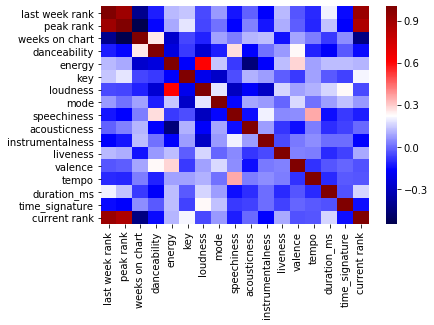

In [522]:
import seaborn as sns
sns.heatmap(music_df.corr(), cmap='seismic')

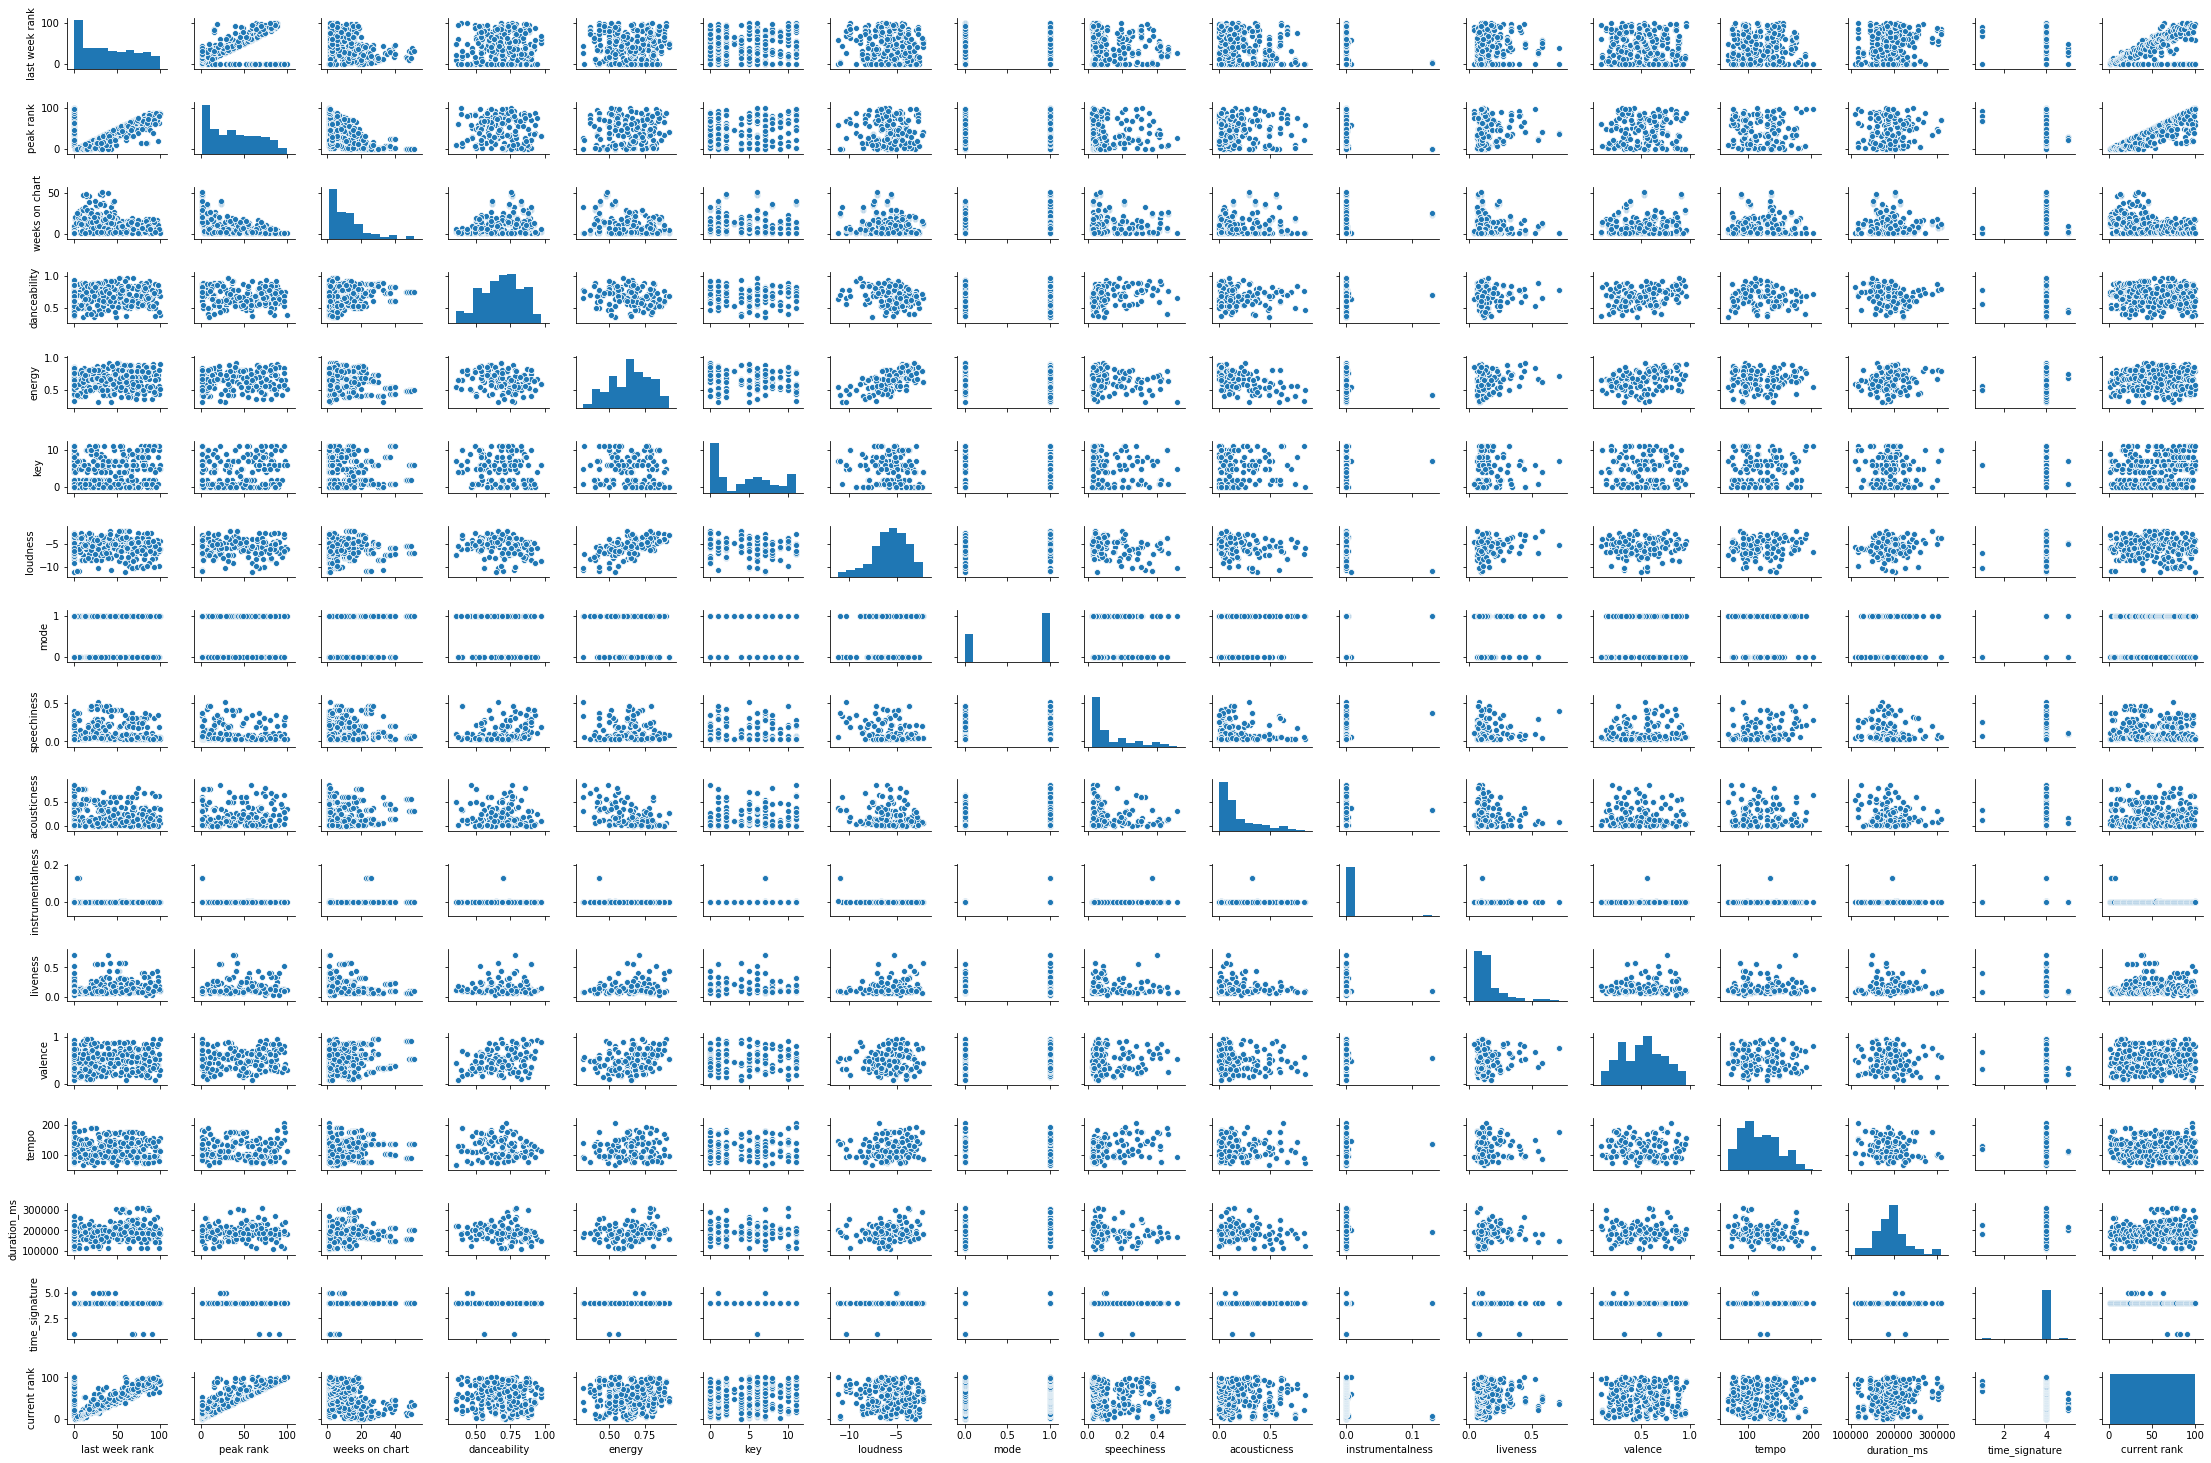

In [530]:
# Pairplot
sns.pairplot(music_df, height=1.2, aspect=1.5);

In [528]:
# fill the empty last week rank with 0
music_df = music_df.fillna(0)

# - Sample API Calls

In [653]:
get_spotify_features('bangarang', 'skrillex')

[odict_values([0.716, 0.972, 7, -2.302, 1, 0.196, 0.0145, 3.22e-05, 0.317, 0.576, 110.026, 'audio_features', '6VRhkROS2SZHGlp0pxndbJ', 'spotify:track:6VRhkROS2SZHGlp0pxndbJ', 'https://api.spotify.com/v1/tracks/6VRhkROS2SZHGlp0pxndbJ', 'https://api.spotify.com/v1/audio-analysis/6VRhkROS2SZHGlp0pxndbJ', 215253, 4])]

In [652]:
get_spotify_features('wake me up', 'Avicii')

[odict_values([0.518, 0.784, 2, -5.659, 1, 0.0524, 0.00346, 0.00187, 0.171, 0.588, 124.102, 'audio_features', '4h8VwCb1MTGoLKueQ1WgbD', 'spotify:track:4h8VwCb1MTGoLKueQ1WgbD', 'https://api.spotify.com/v1/tracks/4h8VwCb1MTGoLKueQ1WgbD', 'https://api.spotify.com/v1/audio-analysis/4h8VwCb1MTGoLKueQ1WgbD', 247427, 4])]